## <center> PREDICTION OF  REALE - STATE USING RANDOMFORESTREGRESSOR




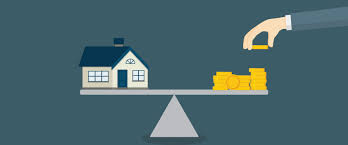


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import klib as k

In [2]:
data=pd.read_csv('Real estate.csv')
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
data=data.rename(columns={'X1 transaction date':'Transaction_date','X2 house age':'HouseAge','X3 distance to the nearest MRT station':'Distance to the nearest MRT station','X4 number of convenience stores':'Number of convenience stores','X5 latitude':'Latitude','X6 longitude':'Longitude','Y house price of unit area':'House price of unit area'})
data

,No,Transaction_date,HouseAge,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
data.head()

,No,Transaction_date,HouseAge,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   Transaction_date                     414 non-null    float64
 2   HouseAge                             414 non-null    float64
 3   Distance to the nearest MRT station  414 non-null    float64
 4   Number of convenience stores         414 non-null    int64  
 5   Latitude                             414 non-null    float64
 6   Longitude                            414 non-null    float64
 7   House price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
data.shape

(414, 8)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
Transaction_date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
HouseAge,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
Distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
Number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
Latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
Longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
House price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [8]:
data.isnull().mean()*100

No                                     0.0
Transaction_date                       0.0
HouseAge                               0.0
Distance to the nearest MRT station    0.0
Number of convenience stores           0.0
Latitude                               0.0
Longitude                              0.0
House price of unit area               0.0
dtype: float64

### UNIVARIATE ANALYSIS


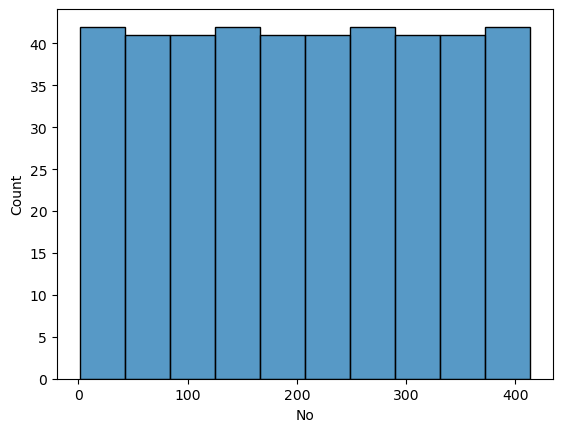

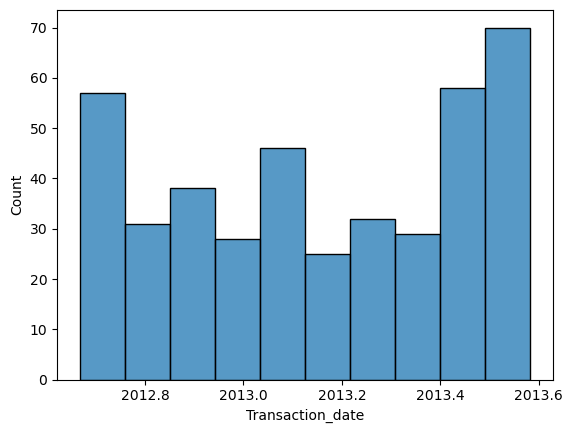

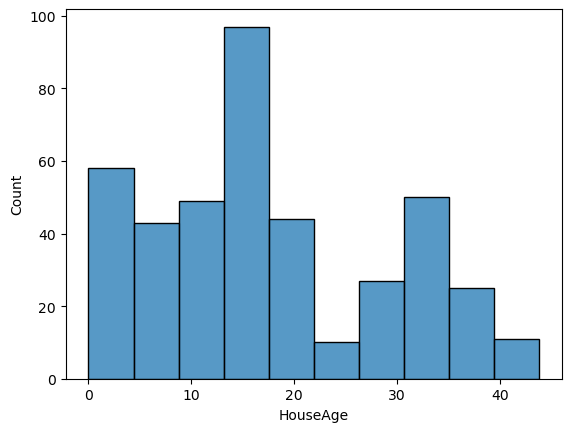

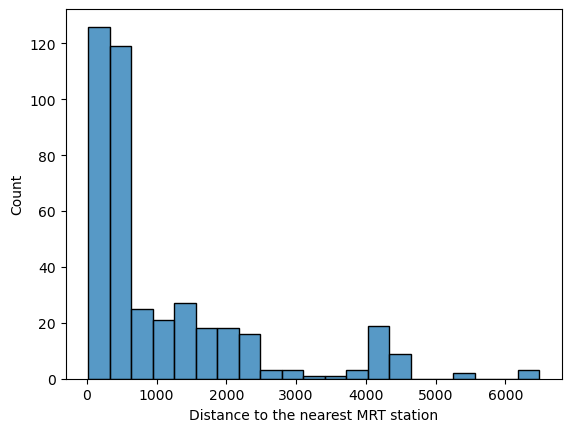

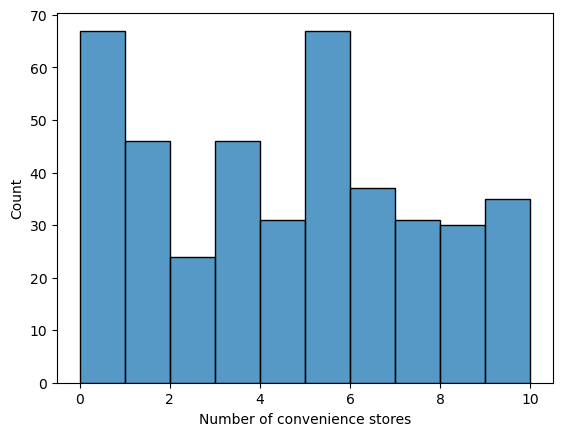

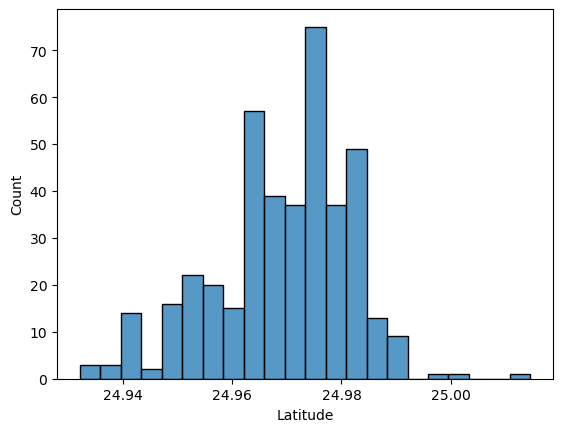

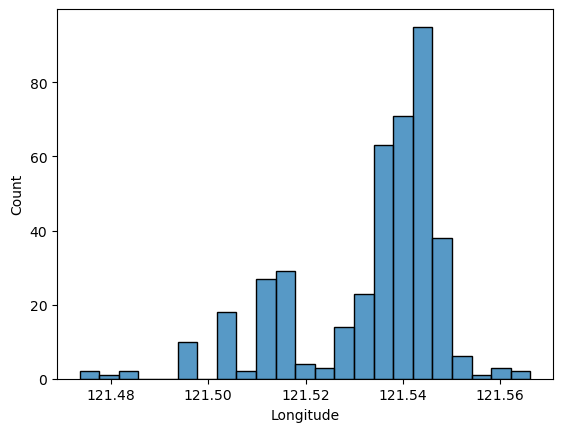

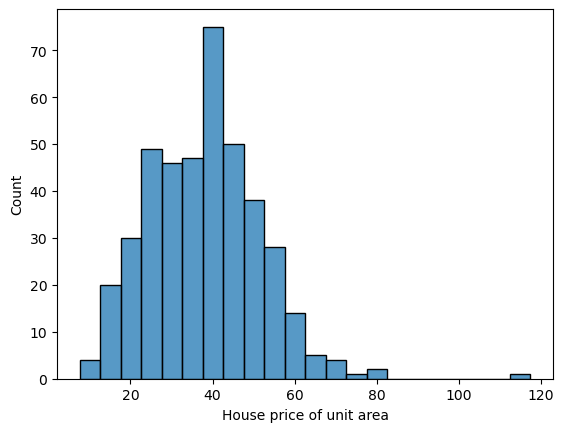

In [9]:
for i in data.columns:
    if data[i].dtypes !='object':
        sns.histplot(x=data[i])
        plt.show()

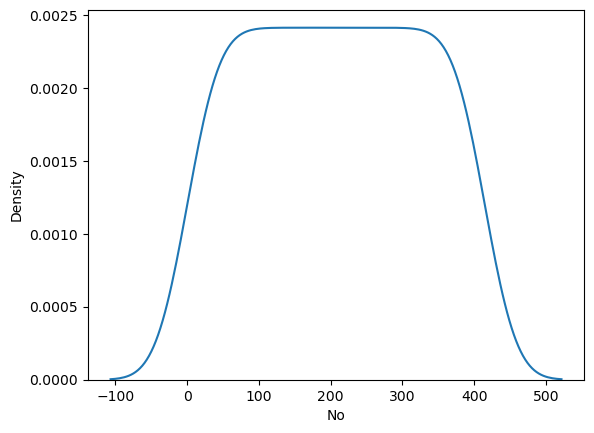

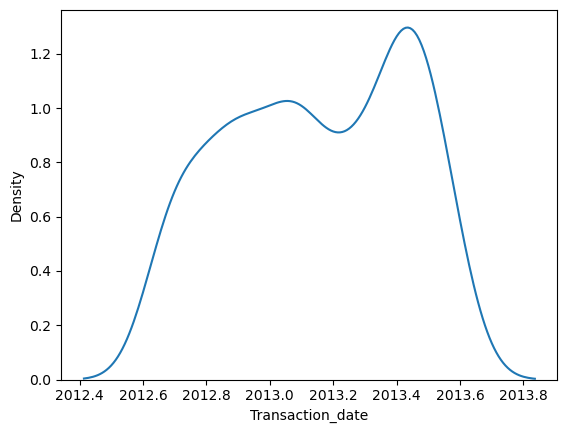

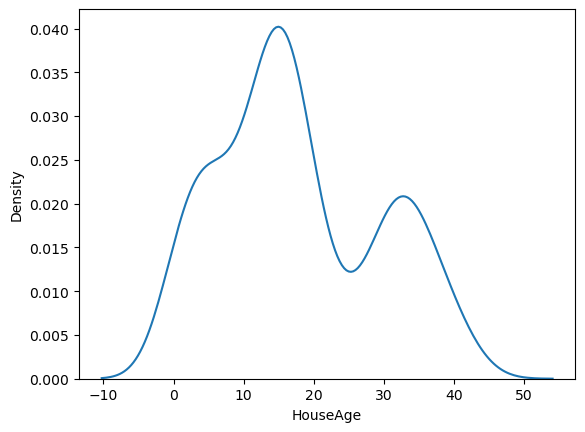

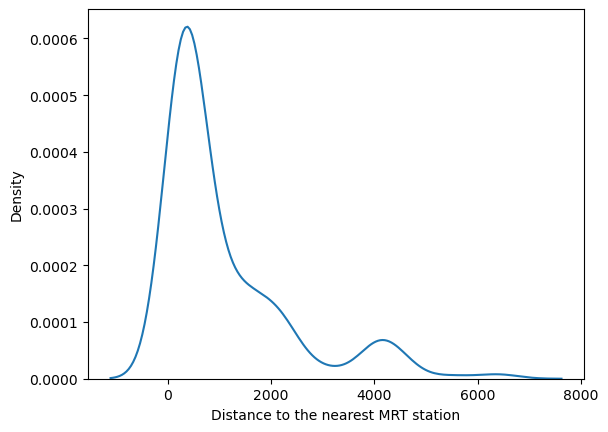

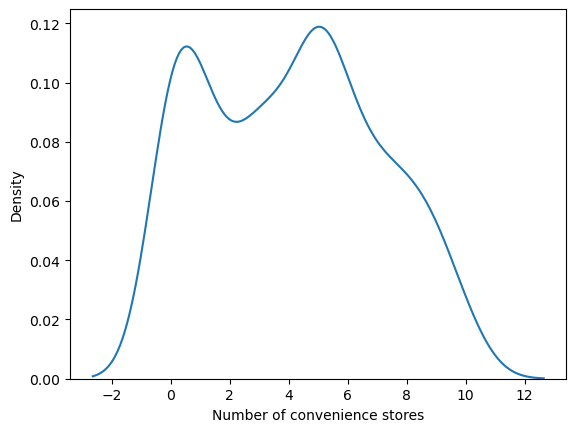

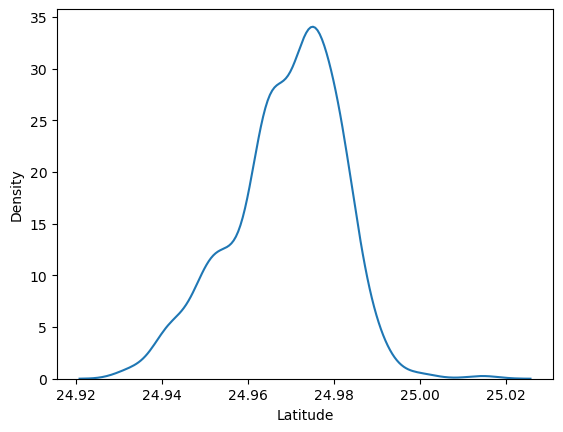

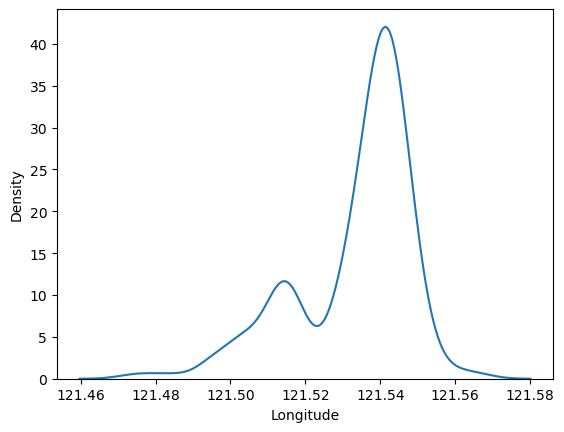

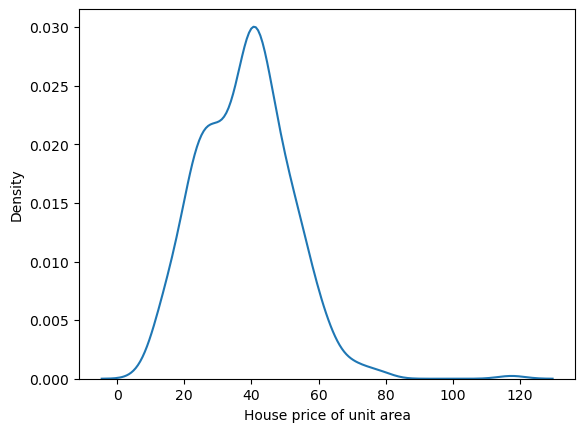

In [10]:
for i in data.columns:
    if data[i].dtypes !='object':
        sns.kdeplot(x=data[i])
        plt.show()

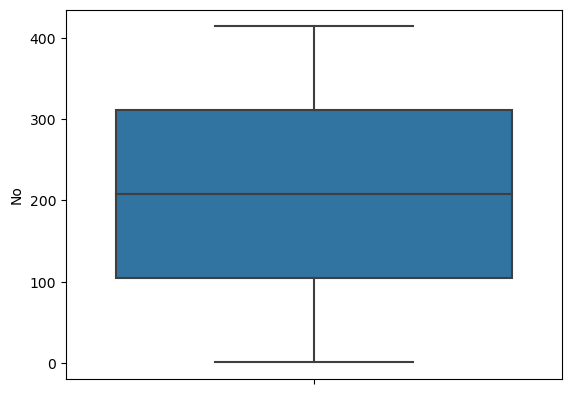

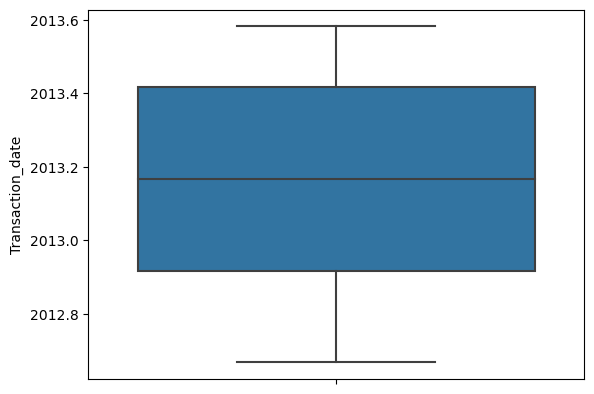

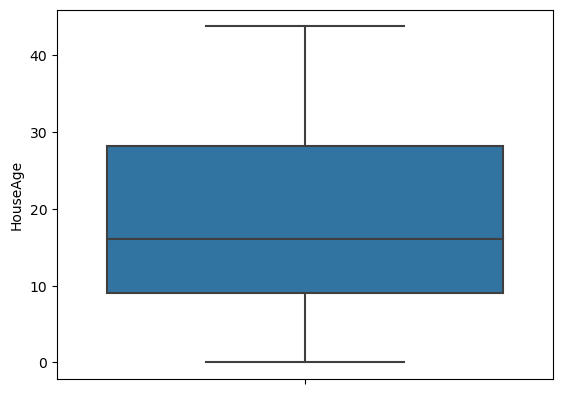

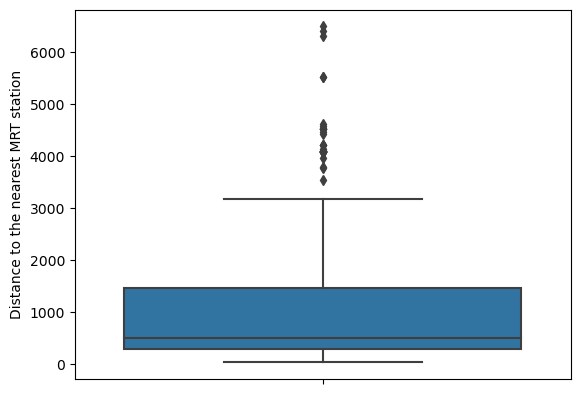

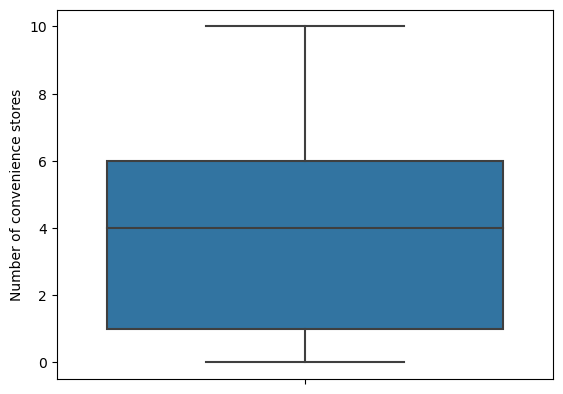

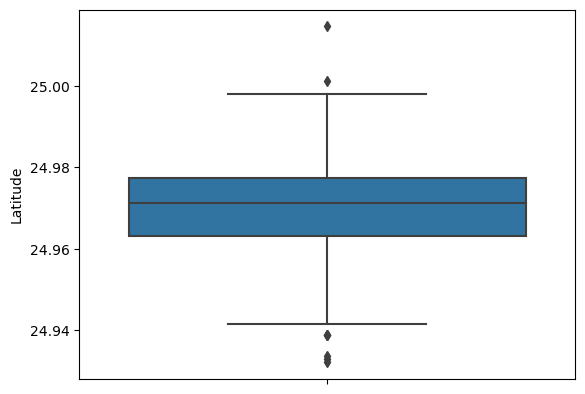

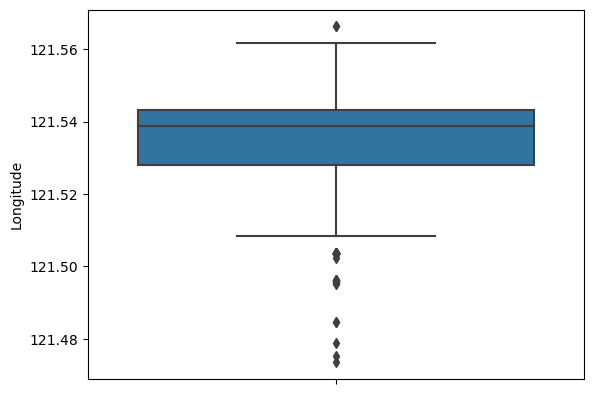

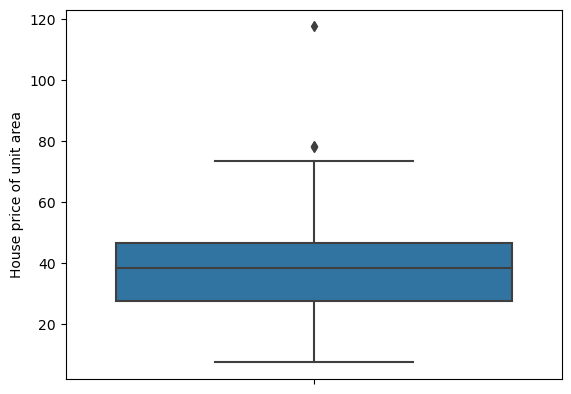

In [11]:
for i in data.columns:
    if data[i].dtypes !="object":
        sns.boxplot(y=data[i])
        plt.show()

### SETTING OUTLIER LIMITS:

In [12]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [13]:
for i in data.columns:
    if data[i].dtypes !='object':
        UL,LL=outlier_limit(data[i])
        data[i]=np.where((data[i]>UL)|(data[i]<LL),np.nan,data[i])

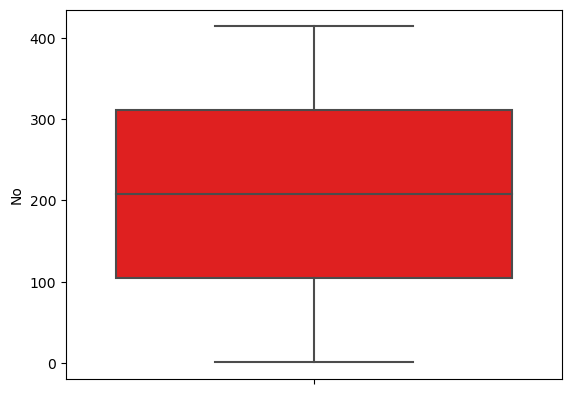

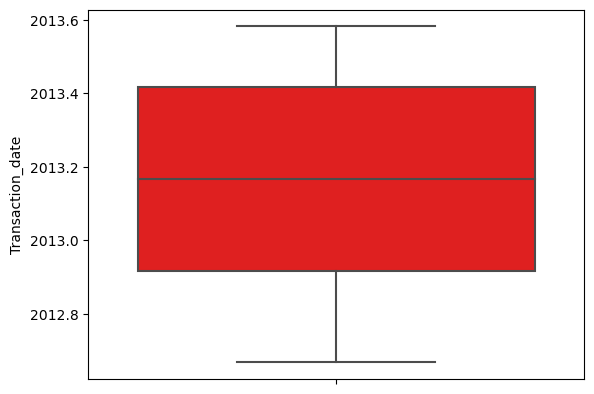

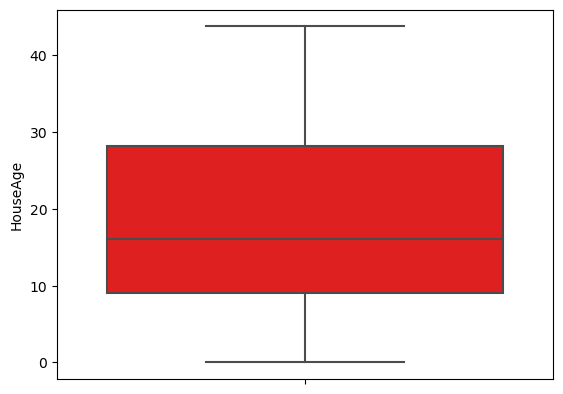

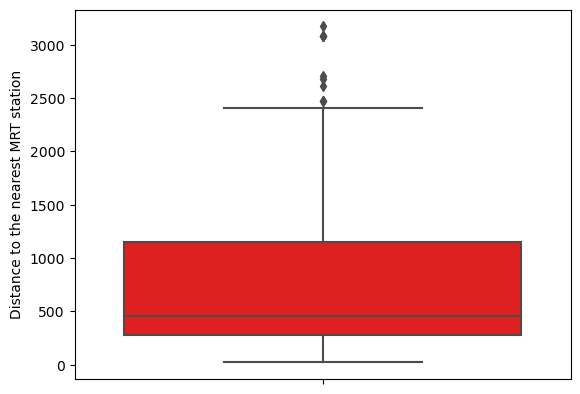

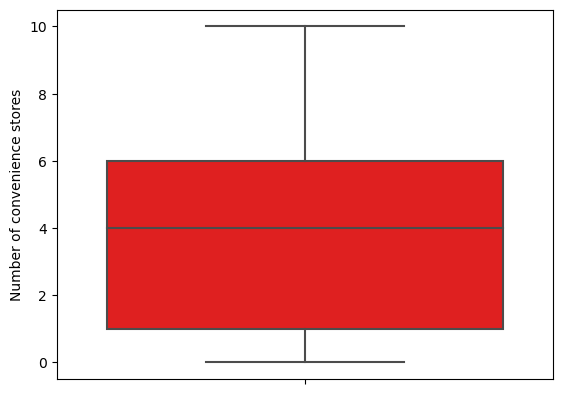

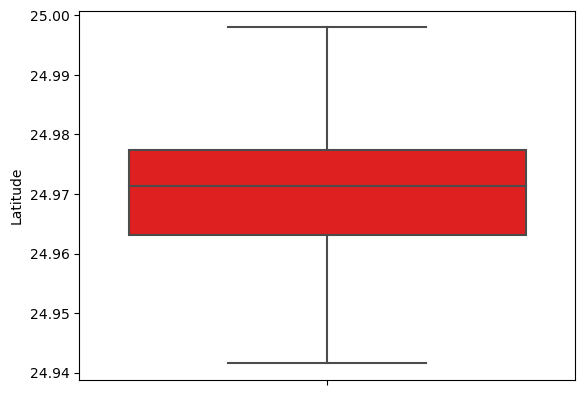

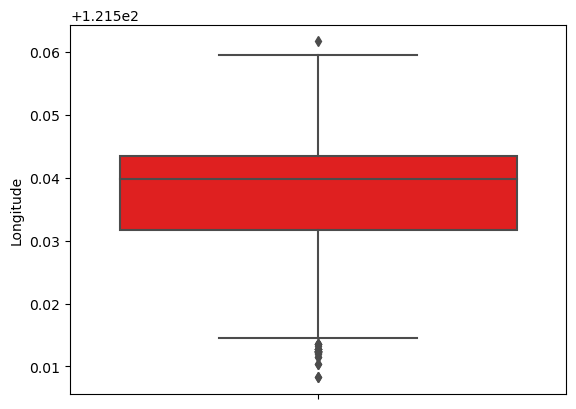

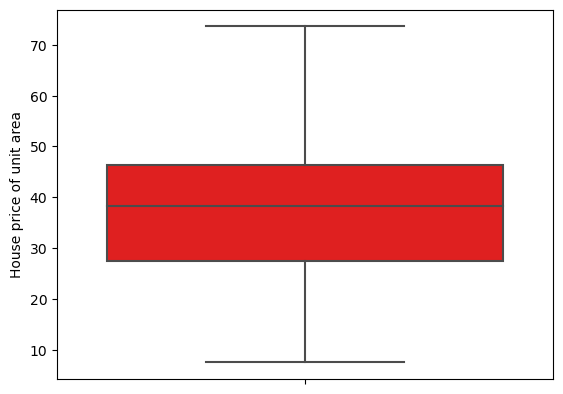

In [14]:
for i in data.columns:
    if data[i].dtypes !='object':
        sns.boxplot(y=data[i],color='red')
        plt.show()

In [15]:
data.dropna(inplace=True)
data

,No,Transaction_date,HouseAge,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,1.0,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2.0,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,3.0,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,4.0,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,5.0,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
408,409.0,2013.417,18.5,2175.74400,3.0,24.96330,121.51243,28.1
410,411.0,2012.667,5.6,90.45606,9.0,24.97433,121.54310,50.0
411,412.0,2013.250,18.8,390.96960,7.0,24.97923,121.53986,40.6
412,413.0,2013.000,8.1,104.81010,5.0,24.96674,121.54067,52.5


### BIVARIATE   ANALYSIS

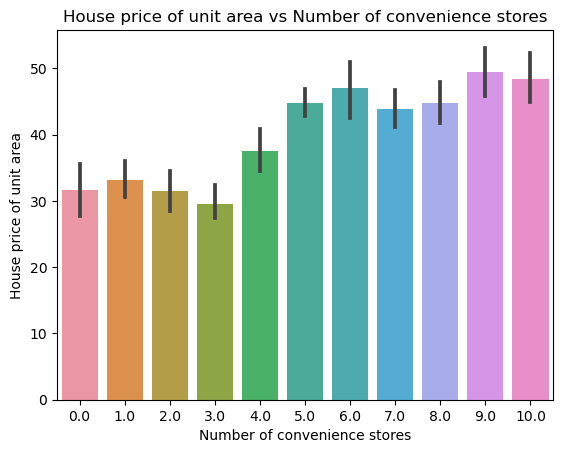

In [16]:
plt.title('House price of unit area vs Number of convenience stores')
sns.barplot(x='Number of convenience stores',y='House price of unit area',data=data);

<AxesSubplot:xlabel='HouseAge', ylabel='House price of unit area'>

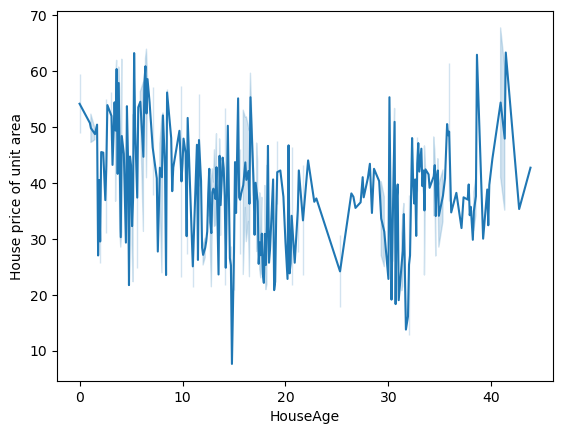

In [17]:
sns.lineplot(x="HouseAge",y='House price of unit area',data=data)

### CHECKING THE CORRELATION WITH THE TARGET 'HOUSE PRICE OF UNIT AREA'

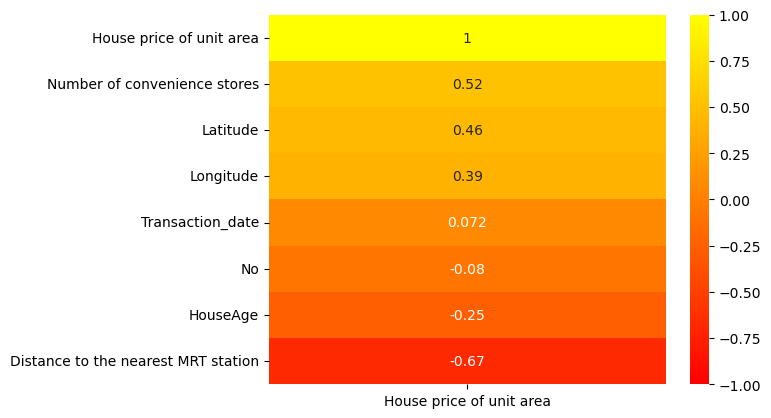

In [18]:
sns.heatmap(data.corr()[['House price of unit area']].sort_values(by='House price of unit area',ascending=False),vmin=-1,vmax=1,annot=True,cmap='autumn');

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   371 non-null    float64
 1   Transaction_date                     371 non-null    float64
 2   HouseAge                             371 non-null    float64
 3   Distance to the nearest MRT station  371 non-null    float64
 4   Number of convenience stores         371 non-null    float64
 5   Latitude                             371 non-null    float64
 6   Longitude                            371 non-null    float64
 7   House price of unit area             371 non-null    float64
dtypes: float64(8)
memory usage: 26.1 KB


In [20]:
x=data[['Number of convenience stores','Latitude']].values

In [21]:
y=data[['House price of unit area']].values

### FEATURE  SCALING

In [22]:
sc=StandardScaler()

In [23]:
x=sc.fit_transform(x)

### SPLITTING THE DATA INTO TRAINING AND TESTING SET

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

### MODEL SELECTION

In [25]:
models = { 
    "LinearRegression": LinearRegression(), 
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "LinearSVR":LinearSVR(), 
    "DecisionTreeRegressor":DecisionTreeRegressor(), 
    "GradientBoostingRegressor":GradientBoostingRegressor(), 
    "AdaBoostRegressor":AdaBoostRegressor(), 
    "RandomForestRegressor":RandomForestRegressor() 
}



In [26]:
for name, model in models.items(): 
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1) 
    print("cross validation model : {}".format(name)) 
    rmse = np.sqrt(-scores) 
    rmse_average = np.mean(rmse) 
    print("AVERAGE RMSE: ",rmse_average) 
    print("*"*100)


cross validation model : LinearRegression
AVERAGE RMSE:  9.258787584170902
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  9.2586581120253
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  9.338732857284622
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  9.512036370856993
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  8.127576585993207
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  7.231510557402862
**************************************************************

### WE  CAN  SEE  THAT   " RANDOMFORESTREGRESSOR " IS  HAVING THE  BEST  OVERALL  PERFORMANCE  SO  FAR . WE  MAY  PROCEED  WITH  IT.

In [27]:
model = RandomForestRegressor()

In [28]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [29]:
training_score = model.score(x_train, y_train)*100
training_score

91.87304978466553

In [30]:
testing_score = model.score(x_test, y_test)*100
testing_score

61.119375477393234

In [31]:
R2_score=r2_score(y_test,model.predict(x_test))*100
R2_score

61.119375477393234

In [32]:
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

5.194889497833318

In [33]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

51.63819448511933

In [34]:
y_pred=model.predict(x)

In [35]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,37.9,47.482333
1,42.2,41.096167
2,47.3,42.139417
3,54.8,42.139417
4,43.1,47.124693


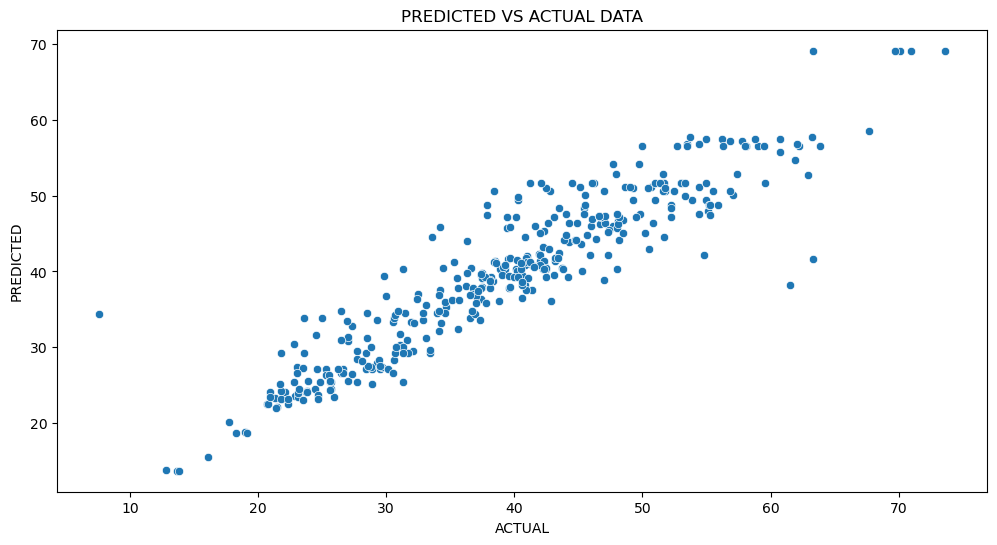

In [36]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");

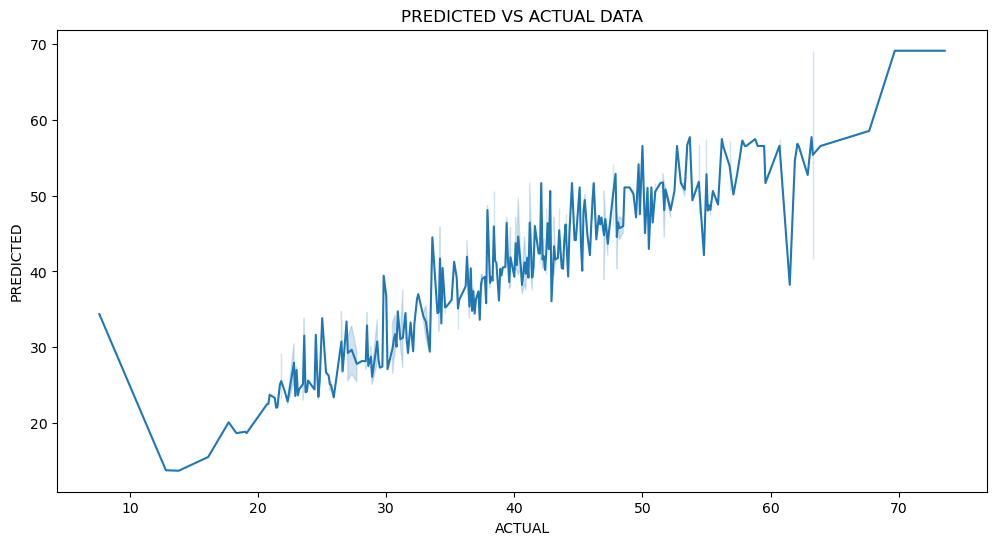

In [37]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");